In [2]:
import xarray as xr
import numpy  as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import skill_metrics as sm

2020.12.07<br>
VR & RCM taylor series combine<br>

读入RCM数据

In [3]:
# year = ["2003","2004","2005","2006","2007","2008","2009"]
year = ["2003"]
months = ["4","5","6","7","8"]
year_stats_rcm = {} # 当年的统计量
modtype = "RCM"
for year_ind in year:
    # xarray 读取数据
    diri = "/m2data2/yycheng/yycheng/MPAS/92-25km_"+modtype+"_"+year_ind+"/postprocess/temp_data/"
    fili = year_ind+"_daily_precip_combine_CMORPH_MPAS_"+modtype+".nc"
    ds_disk = xr.open_dataset(diri + fili)
    precip_obs = ds_disk["precip_CMORPH"]
    precip_mod = ds_disk["precip_MPAS"]
    # 计算逐年05-08序列
    year_obs_mean = precip_obs.mean(dim=["lon","lat"])
    year_mod_mean = precip_mod.mean(dim=["longitude","latitude"])
    # 拆分逐月，计算统计量
    month_stats = {} # 逐月的统计量
    for month_ind in months:
        #  taylor_stats1.append( sm.taylor_statistics(np.array(obs_mean),np.array(mod_mean)) )
        months_obs_mean = year_obs_mean.sel(time = slice(year_ind+"-"+month_ind))
        months_mod_mean = year_mod_mean.sel(Time = slice(year_ind+"-"+month_ind)) # MPAS中奇怪的时间坐标名称Time
        month_stats[month_ind] = sm.taylor_statistics(np.array(months_mod_mean),np.array(months_obs_mean))
    # 逐月合并进逐年
    year_stats_rcm[year_ind] = month_stats


读入VR数据

In [4]:
# year = ["2003","2004","2005","2006","2007","2008","2009"]
year = ["2003"]
months = ["4","5","6","7","8"]
year_stats_vr = {} # 当年的统计量
modtype = "VR"
for year_ind in year:
    # xarray 读取数据
    diri = "/m2data2/yycheng/yycheng/MPAS/92-25km_"+modtype+"_"+year_ind+"/postprocess/temp_data/"
    fili = year_ind+"_daily_precip_combine_CMORPH_MPAS"+".nc"
    ds_disk = xr.open_dataset(diri + fili)
    precip_obs = ds_disk["precip_CMORPH"]
    precip_mod = ds_disk["precip_MPAS"]
    # 计算逐年05-08序列
    year_obs_mean = precip_obs.mean(dim=["lon","lat"])
    year_mod_mean = precip_mod.mean(dim=["longitude","latitude"])
    # 拆分逐月，计算统计量
    month_stats = {} # 逐月的统计量
    for month_ind in months:
        #  taylor_stats1.append( sm.taylor_statistics(np.array(obs_mean),np.array(mod_mean)) )
        months_obs_mean = year_obs_mean.sel(time = slice(year_ind+"-"+month_ind))
        months_mod_mean = year_mod_mean.sel(Time = slice(year_ind+"-"+month_ind)) # MPAS中奇怪的时间坐标名称Time
        month_stats[month_ind] = sm.taylor_statistics(np.array(months_mod_mean),np.array(months_obs_mean))
    # 逐月合并进逐年
    year_stats_vr[year_ind] = month_stats


In [5]:
year_stats_vr['2003']['7']

{'ccoef': array([1.        , 0.75736147]),
 'crmsd': [0.0, 1.1940667434900532],
 'sdev': [1.2280755, 1.8148040813393982]}

In [6]:
year_stats_rcm['2003']['4']

{'ccoef': array([1.        , 0.76451974]),
 'crmsd': [0.0, 0.28786788562330723],
 'sdev': [0.4069667, 0.429668630561532]}

2020.12.2<br>
将不同时间段的 taylor diagram 进行归一化

泰勒图绘制：考虑绘制不同年份的同一月的泰勒图，使用了normalized,obs始终在（1，0）的位置

In [7]:
# >> taylor_diagram
# 不是多个模型对同一时段的模拟，绘制taylor图只是说明下相关性
# 逐年的固定某个月份 下面的 rmsd_select_year 在 months 中的范围大致是相同的
# label = ['Non-Dimensional Observation', 'M1']
# year_select = ["2003","2004","2005","2006","2007","2008","2009"]
year_select = ["2003"]
months = ["4","5","6","7","8"]
# months = ['8']
rmsd_select_year='2003'

for year_ind in year_select:
    sdev  = {}
    crmsd = {}
    ccoef = {}
    sdev_obs = {}
    sdev['VR']  = []
    sdev['RCM']  = []
    crmsd['VR'] = []
    crmsd['RCM'] = []
    ccoef['VR'] = []
    ccoef['RCM'] = []
    # statistics can be normalized
    # obs sdev=1 crmsd=0 ccoef=1
    sdev['VR'].append(year_stats_vr[rmsd_select_year][month_ind]['sdev'][0]/year_stats_vr[rmsd_select_year][month_ind]['sdev'][0])
    crmsd['VR'].append(year_stats_vr[rmsd_select_year][month_ind]['crmsd'][0]/year_stats_vr[rmsd_select_year][month_ind]['sdev'][0])
    ccoef['VR'].append(year_stats_vr[rmsd_select_year][month_ind]['ccoef'][0])

    sdev['RCM'].append(year_stats_rcm[rmsd_select_year][month_ind]['sdev'][0]/year_stats_rcm[rmsd_select_year][month_ind]['sdev'][0])
    crmsd['RCM'].append(year_stats_rcm[rmsd_select_year][month_ind]['crmsd'][0]/year_stats_rcm[rmsd_select_year][month_ind]['sdev'][0])
    ccoef['RCM'].append(year_stats_rcm[rmsd_select_year][month_ind]['ccoef'][0])

    for month_ind in months:
        # print( year_stats[year_ind][select_month]['sdev'][1] )
        # for i in year_stats[year_ind]:
        # # taylor_stats1[:]["ccoef"]
        #     # print(i['crmsd'][1])
        # for month_ind in months:

        sdev['VR'].append(year_stats_vr[year_ind][month_ind]['sdev'][1]/year_stats_vr[year_ind][month_ind]['sdev'][0])
        crmsd['VR'].append(year_stats_vr[year_ind][month_ind]['crmsd'][1]/year_stats_vr[year_ind][month_ind]['sdev'][0])
        ccoef['VR'].append(year_stats_vr[year_ind][month_ind]['ccoef'][1])

        sdev['RCM'].append(year_stats_rcm[year_ind][month_ind]['sdev'][1]/year_stats_rcm[year_ind][month_ind]['sdev'][0])
        crmsd['RCM'].append(year_stats_rcm[year_ind][month_ind]['crmsd'][1]/year_stats_rcm[year_ind][month_ind]['sdev'][0])
        ccoef['RCM'].append(year_stats_rcm[year_ind][month_ind]['ccoef'][1])
            # sdev_obs.append(i['sdev'][0])

    # sdev  = np.array(sdev)
    # crmsd = np.array(crmsd)
    # ccoef = np.array(ccoef)

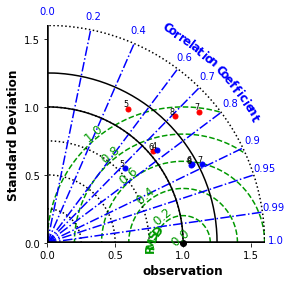

In [10]:
intervalsCOR = np.concatenate((np.arange(0,1.0,0.2), [0.7,0.9, 0.95, 0.99, 1]))
label = ["obs","4","5","6","7","8"]
# label = {'ERA-5': 'r', 'TRMM': 'b'}
sm.taylor_diagram(np.array(sdev['VR']),np.array(crmsd['VR']),np.array(ccoef['VR']), markerLabel = label, 
                    tickRMS = np.arange(0,1.2,0.2), tickRMSangle = 130, 
                    # colRMS = 'm', styleRMS = ':', widthRMS = 2.0,
                    tickCOR = intervalsCOR,
                    tickSTD = np.arange(0,1.5,0.25), axismax = 1.6, 
                    showlabelsSTD = 'on',
                    rmslabelformat = ':.1f',
                    styleOBS = '-', 
                    colOBS = 'k',
                    markerobs = 'o', 
                    titleOBS = 'observation')

sm.taylor_diagram(np.array(sdev['RCM']),np.array(crmsd['RCM']),np.array(ccoef['RCM']), markerLabel = label, 
                    tickRMS = np.arange(0,1.2,0.2), tickRMSangle = 130, markerColor = 'b', 
                    # colRMS = 'm', styleRMS = ':', widthRMS = 2.0,
                    tickCOR = intervalsCOR,
                    tickSTD = np.arange(0,1.5,0.25), axismax = 1.6, 
                    showlabelsSTD = 'on',
                    rmslabelformat = ':.1f',
                    styleOBS = '-', 
                    colOBS = 'k',
                    markerobs = 'o', 
                    titleOBS = 'observation',
                    overlay = 'on')
# plt.title("month "+month_ind)
output_pic_path = "/m2data2/yycheng/playground/MPAS_case_study/case_template/92-25km_vr_case_postprocess/visualization/check_cmorph_rcm/output_pic/"
plt.savefig(output_pic_path + "taylor_RCM&VR_normalized_2003",dpi=300)
# del(ax)